In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style= "darkgrid")
%matplotlib inline

In [2]:
import torch
import os
from tqdm import tqdm
import numpy as np

In [3]:
index_list = []
cv_loss_list = []
root = '/workspace/model_log/db-aiat/by_type/blower_new/CP_dir/step_cv'
ckpt_list = os.listdir(root)
for ckpt_name in tqdm(ckpt_list):
    if ckpt_name.endswith('.tar'):
        *_, epoch_str, step_str = ckpt_name.split('_')
        step_str = step_str.split('.')[0]
        epoch = int(epoch_str[:-5])
        step = int(step_str[:-4])

        path = os.path.join(root, ckpt_name)
        ckpt = torch.load(path, map_location='cpu')
        cv_loss = ckpt['cv_loss']
        # str_line = f'epoch: {epoch}, step: {step}, loss: {cv_loss}'
        # print(str_line)
        index_list.append(f'epoch: {epoch}, step: {step}')
        cv_loss_list.append(cv_loss)

100%|██████████| 242/242 [00:13<00:00, 17.58it/s]


epoch: 9, step: 301


<AxesSubplot:>

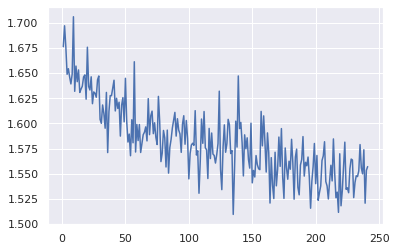

In [4]:
print(index_list[np.argmin(np.array(cv_loss_list))])
# print('min_loss:', min(cv_loss_list))
sns.lineplot(x=range(1, 1+len(cv_loss_list)), y=cv_loss_list)

In [9]:
train_loss_list = []
val_loss_list = []
for nth in range(1, 8):
    path = f'/workspace/model_log/db-aiat/3rd_trial/CP_dir/checkpoint_early_exit_{nth}th.pth.tar'
    checkpoint = torch.load(path)
    train_loss_list.append(checkpoint['tr_loss'])
    val_loss_list.append(checkpoint['cv_loss'])

<AxesSubplot:>

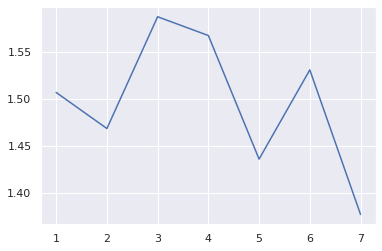

In [11]:
sns.lineplot(x=range(1, 8), y=val_loss_list)

In [12]:
train_loss_list = []
val_loss_list = []
for nth in range(1, 31):
    path = f'/workspace/SE_2022/model_experiment/db-aiat/training_script/CP_dir/checkpoint_early_exit_{nth}th.pth.tar'
    checkpoint = torch.load(path)
    train_loss_list.append(checkpoint['tr_loss'])
    val_loss_list.append(checkpoint['cv_loss'])

<AxesSubplot:>

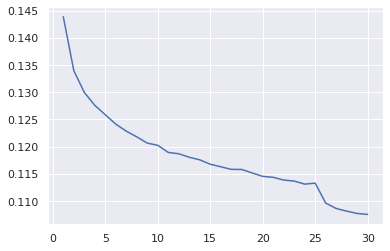

In [13]:
sns.lineplot(x=range(1, 31), y=train_loss_list)

<AxesSubplot:>

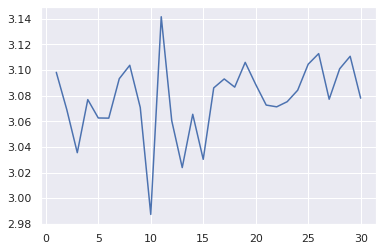

In [14]:
sns.lineplot(x=range(1, 31), y=val_loss_list)